# SPAM DETECTION

### Com CountVectorizer

In [95]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
emails_df = pd.read_csv('./../../datasets/spam_or_not_spam.csv')

In [97]:
emails_df.dropna(inplace=True)

In [98]:
#emails_df['label'].value_counts()
emails_df['label'].value_counts(normalize=True)

0    0.833611
1    0.166389
Name: label, dtype: float64

In [99]:
X = emails_df['email']
y = emails_df['label']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=99)

In [100]:
y_treino.value_counts(normalize=True)
#y_teste.value_counts(normalize=True)

0    0.829919
1    0.170081
Name: label, dtype: float64

In [101]:
# Criando objeto CountVectorizer e transformando as variáveis
cvectorizer = CountVectorizer()
X_treino_cv = cvectorizer.fit_transform(X_treino)
X_teste_cv = cvectorizer.transform(X_teste)

In [102]:
# Treinando o modelo fazendo cross validation
model = MultinomialNB()
model.fit(X_treino_cv, y_treino)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
results = cross_val_score(model, X_treino_cv, y_treino, cv=skfold, scoring='recall')

In [103]:
round(results.mean()*100, 2)

94.96

In [104]:
# Utilizando o conjunto de teste
prev_teste1 = model.predict(X_teste_cv)

<AxesSubplot: >

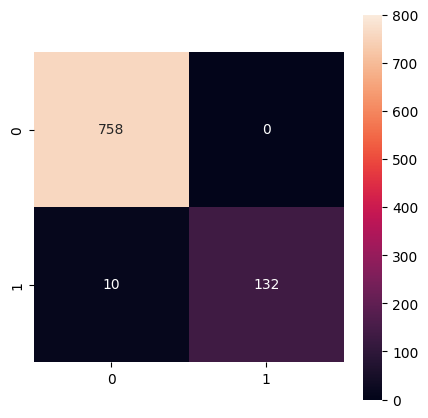

In [105]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_teste, prev_teste1), vmin=0, vmax=800,square=True,fmt=".0f",annot=True)

In [106]:
print(classification_report(y_teste, prev_teste1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       758
           1       1.00      0.93      0.96       142

    accuracy                           0.99       900
   macro avg       0.99      0.96      0.98       900
weighted avg       0.99      0.99      0.99       900



### Com TFidVectorizer

In [107]:
vectorizer_tfidf = TfidfVectorizer()
X_treino_tf = vectorizer_tfidf.fit_transform(X_treino)
X_teste_tf = vectorizer_tfidf.transform(X_teste)

In [108]:
# Treinando o modelo fazendo cross validation
model2 = MultinomialNB()
model2.fit(X_treino_tf, y_treino)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
results2 = cross_val_score(model2, X_treino_tf, y_treino, cv=skfold, scoring='recall')

In [109]:
round(results2.mean()*100, 2)

11.21

In [110]:
results

array([0.94444444, 0.95833333, 0.91549296, 0.97183099, 0.95774648])